# Create Latitdue and Longtitdue Combinations 

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests Library
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lat, lngs)
lat_lngs

NOTE: The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)
coordinates

[(-89.99479764820397, -32.07338558548605),
 (61.17478730212011, -80.90799226909247),
 (-82.8915810837075, -94.88729646505715),
 (46.050541947173855, 108.2141969357354),
 (75.20237172576014, 7.630446786907612),
 (26.026525602088526, 147.64902538289442),
 (-82.11974335654759, -41.75030461471894),
 (77.3148730978325, -63.83332608473117),
 (-37.38341126742008, 163.3492343175642),
 (50.86351552163751, 33.32673138391772),
 (24.831893264710203, -14.78432267387575),
 (-58.86854842013599, -148.02415754257814),
 (-82.07573078869629, 149.34283813164137),
 (-52.98408872446828, -47.35409780663903),
 (58.71506252448452, 171.14375164084265),
 (-37.71539732794996, 131.68048015107888),
 (-88.43106412516421, -138.41288283401144),
 (8.86349356337962, 41.837617429732006),
 (85.53702849968954, 158.48056017201532),
 (68.51884808934093, 47.876588108689816),
 (-35.25145874811244, 129.8638358907201),
 (77.92472668938726, 83.88501162659611),
 (-18.348769661338267, -177.26038217342537),
 (10.493769531346786, 82.

In [4]:
# CReate a list for holding the cities
cities = []

# Identify nearest city for each latitude and langitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficent count
len(cities)


619

In [5]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Build URL for Weather API call using my weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2da7a75bec452d6b50dec61169b3f93


NOTE: To move forward with the next cell, we imported the citipy module so that we could get cities and countries. The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [7]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the citiy count to confirm sufficient count
len(cities)

619

# Get the City Weather Data

In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.

##### Loop through the List of Cities and Build the City URL

Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate() method is the following:

### Handle API Request with try-except Blocks¶

In [8]:
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing record {record_count} of Set {set_count} | {city}")
          
    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
          
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error is experienced, skip the city          
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete.     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | ushuaia
Processing record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing record 3 of Set 1 | punta arenas
Processing record 4 of Set 1 | darhan
Processing record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing record 6 of Set 1 | katsuura
Processing record 7 of Set 1 | narsaq
Processing record 8 of Set 1 | te anau
Processing record 9 of Set 1 | romny
Processing record 10 of Set 1 | aguimes
Processing record 11 of Set 1 | mataura
Processing record 12 of Set 1 | hobart
Processing record 13 of Set 1 | mar del plata
Processing record 14 of Set 1 | tilichiki
Processing record 15 of Set 1 | port lincoln
Processing record 16 of Set 1 | rikitea
Processing record 17 of Set 1 | harer
Processing record 18 of Set 1 | cherskiy
Processing record 19 of Set 1 | leshukonskoye
Processing record 20 of Set 1 | flinders
Processing record 21 of Set 1 | dikson
Processing record 22 of S

Processing record 40 of Set 4 | palestine
Processing record 41 of Set 4 | tuatapere
Processing record 42 of Set 4 | fairbanks
Processing record 43 of Set 4 | shintomi
Processing record 44 of Set 4 | dongsheng
Processing record 45 of Set 4 | talnakh
Processing record 46 of Set 4 | comodoro rivadavia
Processing record 47 of Set 4 | ca mau
Processing record 48 of Set 4 | kamaishi
Processing record 49 of Set 4 | sao jose da coroa grande
Processing record 50 of Set 4 | hermanus
Processing record 1 of Set 5 | hasaki
Processing record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing record 3 of Set 5 | iberia
Processing record 4 of Set 5 | zeitz
Processing record 5 of Set 5 | voyvozh
Processing record 6 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing record 7 of Set 5 | huntsville
Processing record 8 of Set 5 | dingle
Processing record 9 of Set 5 | nioro
Processing record 10 of Set 5 | tabou
Processing record 11 of Set 5 | dedza
Processing record 12 of Set 5 | be

Processing record 28 of Set 8 | xining
Processing record 29 of Set 8 | boueni
Processing record 30 of Set 8 | lodingen
Processing record 31 of Set 8 | fort nelson
Processing record 32 of Set 8 | sobinka
Processing record 33 of Set 8 | praia da vitoria
Processing record 34 of Set 8 | husavik
Processing record 35 of Set 8 | mont-dore
Processing record 36 of Set 8 | yazman
Processing record 37 of Set 8 | kualakapuas
Processing record 38 of Set 8 | ocampo
Processing record 39 of Set 8 | puerto pinasco
City not found. Skipping...
Processing record 40 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing record 41 of Set 8 | bonavista
Processing record 42 of Set 8 | nola
Processing record 43 of Set 8 | xichang
Processing record 44 of Set 8 | acajutla
Processing record 45 of Set 8 | nenjiang
Processing record 46 of Set 8 | avenal
Processing record 47 of Set 8 | roros
Processing record 48 of Set 8 | ossora
Processing record 49 of Set 8 | maarianhamina
Processing record 50 of S

Processing record 13 of Set 12 | almenara
Processing record 14 of Set 12 | licheng
Processing record 15 of Set 12 | berdigestyakh
Processing record 16 of Set 12 | marienburg
Processing record 17 of Set 12 | sinnamary
Processing record 18 of Set 12 | kochubey
Processing record 19 of Set 12 | cascais
Processing record 20 of Set 12 | tula
Processing record 21 of Set 12 | taree
Processing record 22 of Set 12 | santa cruz cabralia
Processing record 23 of Set 12 | wajima
Processing record 24 of Set 12 | pelhrimov
Processing record 25 of Set 12 | viedma
Processing record 26 of Set 12 | mount isa
Processing record 27 of Set 12 | zhezkazgan
Processing record 28 of Set 12 | ustye
Processing record 29 of Set 12 | klaksvik
Processing record 30 of Set 12 | pozo colorado
Processing record 31 of Set 12 | lorengau
Processing record 32 of Set 12 | alugan
Processing record 33 of Set 12 | abnub
Processing record 34 of Set 12 | alofi
Processing record 35 of Set 12 | kargil
Processing record 36 of Set 12 |

In [10]:
len(city_data)

569

##### Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.87,98,100,2.95,AR,2022-04-29 04:25:08
1,Punta Arenas,-53.1500,-70.9167,42.91,70,75,18.41,CL,2022-04-29 04:25:45
2,Darhan,49.4867,105.9228,46.58,20,0,7.11,MN,2022-04-29 04:25:45
3,Katsuura,35.1333,140.3000,61.50,93,100,14.27,JP,2022-04-29 04:25:46
4,Narsaq,60.9167,-46.0500,43.02,81,100,1.54,GL,2022-04-29 04:25:47
5,Te Anau,-45.4167,167.7167,60.04,66,100,1.61,NZ,2022-04-29 04:25:47
6,Romny,50.7510,33.4747,42.26,79,13,5.61,UA,2022-04-29 04:25:48
7,Aguimes,27.9054,-15.4461,61.43,68,75,23.02,ES,2022-04-29 04:25:49
8,Mataura,-46.1927,168.8643,57.47,69,51,0.89,NZ,2022-04-29 04:25:49
9,Hobart,-42.8794,147.3294,71.46,73,75,13.80,AU,2022-04-29 04:21:38


In [12]:
# Reorder the Colums as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-29 04:25:08,-54.8000,-68.3000,37.87,98,100,2.95
1,Punta Arenas,CL,2022-04-29 04:25:45,-53.1500,-70.9167,42.91,70,75,18.41
2,Darhan,MN,2022-04-29 04:25:45,49.4867,105.9228,46.58,20,0,7.11
3,Katsuura,JP,2022-04-29 04:25:46,35.1333,140.3000,61.50,93,100,14.27
4,Narsaq,GL,2022-04-29 04:25:47,60.9167,-46.0500,43.02,81,100,1.54
5,Te Anau,NZ,2022-04-29 04:25:47,-45.4167,167.7167,60.04,66,100,1.61
6,Romny,UA,2022-04-29 04:25:48,50.7510,33.4747,42.26,79,13,5.61
7,Aguimes,ES,2022-04-29 04:25:49,27.9054,-15.4461,61.43,68,75,23.02
8,Mataura,NZ,2022-04-29 04:25:49,-46.1927,168.8643,57.47,69,51,0.89
9,Hobart,AU,2022-04-29 04:21:38,-42.8794,147.3294,71.46,73,75,13.80


# Create the output file CSV

In [13]:
output_data_file = "weather_data/cities.csv"

# Export the City_Data into csv
city_data_df.to_csv(output_data_file, index_label= "City_ID")

# Get Data For Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# import the time module.
import time

# Get today's date in seconds
today = time.strftime("%x")
today

'04/28/22'

# Build the Scatter Plot for Latitude vs. Max Temrature

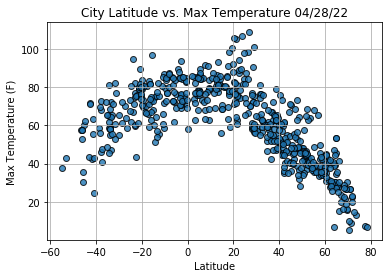

In [16]:
# Build the scatter plot for Latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other Graph Properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure.
plt.savefig("weather_data/Fig1.png")

# Show Plot.
plt.show()

# Build the Scatter Plot for Latitude vs.Humidity

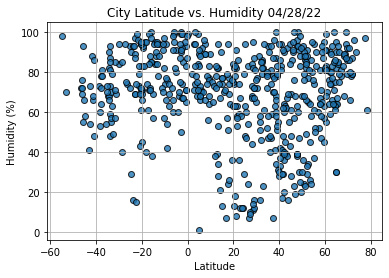

In [17]:
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph Properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show Plot
plt.show()

# Build the Scatter Plot for Latitude vs. Cloudiness

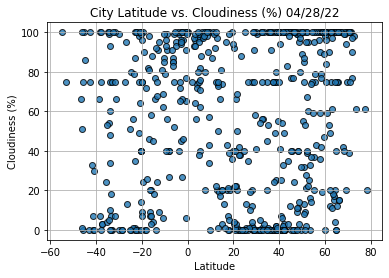

In [18]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph Proerties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))          
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the Figure.
plt.savefig("weather_data/Fig3.png")
          
# Show Plot
plt.show()

# Build the Scatter Plot for Latitude vs. Wind Speed

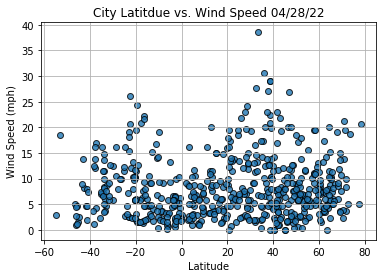

In [19]:
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other Graph Properties.
plt.title(f"City Latitdue vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot
plt.show()

# Perform Linear Regression.

In [20]:
# Import Linear regression from the Scipy stats Module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

## Create the Hemisphere DataFrames

In [22]:
# Create the Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


## Linear Regression on the Max Temp

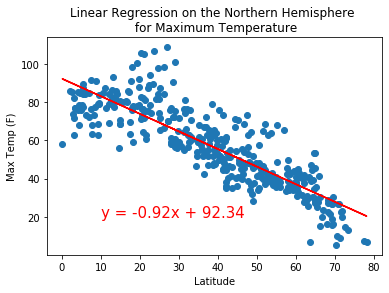

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp (F)',(10,20))

## Linear regression on the Southern Hemisphere

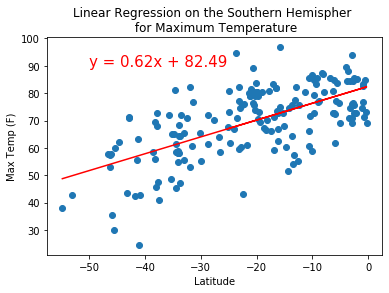

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispher \n for Maximum Temperature',
                       'Max Temp (F)',(-50,90))

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

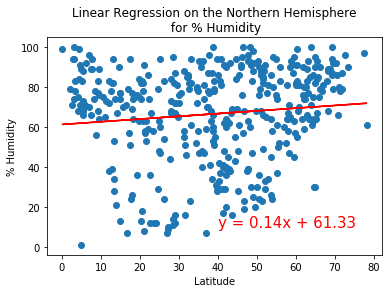

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the Functions.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity', (40,10))

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

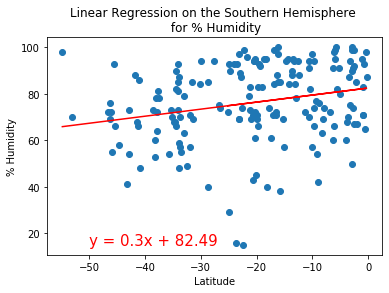

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

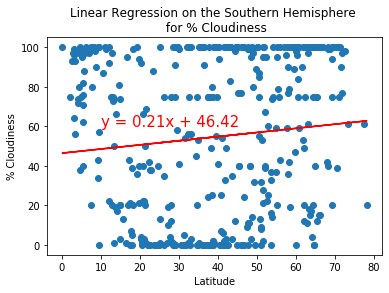

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,60))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

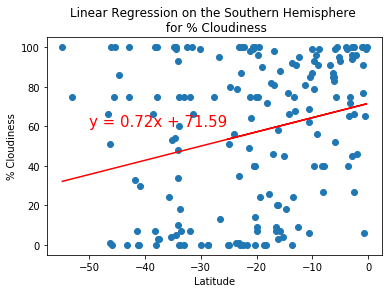

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,60))

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

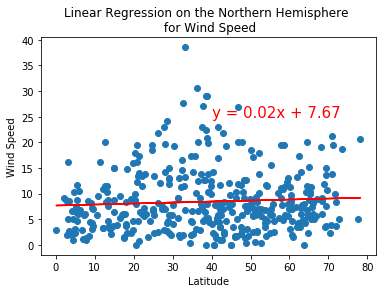

In [29]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the Funstion.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                      'Wind Speed', (40,25))

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

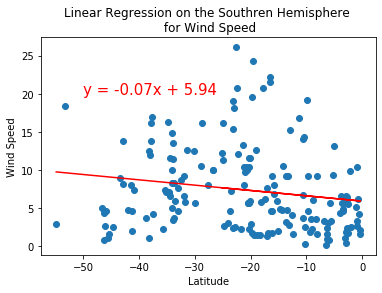

In [30]:
# Linear regression on the Southren Hamisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the Function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southren Hemisphere \n for Wind Speed',
                      'Wind Speed', (-50,20))